In [0]:
import pandas as pd
import numpy as np

In [4]:
data1= pd.read_excel("/content/combined.xlsx")
data1
data2=data1.comb_review

m=0
a=""
for i in data2:
  
  a= a+" "+str(i) 
print(a)

 One Star The arrives Five Stars Awesome item ! It’s nice to have unlimited water It’s nice to have unlimited water. Think there is to many filters for me because the water tastes like distilled water which makes myself more thirsty. Other than that I am happy for the most part. "READ AND FOLLOW" the Instructions for setup to avoid any problems with the setup. We ordered 2 of these water dispenser and coolers for our Company - one of the office and one for our warehouse work area to fill the need of water supply for 2 large groups of employees in two separate work areas. Trying to eliminate the chore of having to purchase cases of bottle water several times a week! Set up a water delivery service and decided it would be better to purchase the cooler rather than paying a monthly rental fee on top of the water delivery service! Turns out to be a wise and cost effective purchase. This is a well known brand and has been very welcomed in the office. Unpacked, plugged in, loaded a bottle of 

In [5]:
pip install gensim

In [6]:
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
"""import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline"""

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [8]:
pip install pyldavis

     |████████████████████████████████| 1.6MB 5.0MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=014c7a039cfea2ab788285d2efe3ca8d405168829d226e62971034e37303194a
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyldavis


In [0]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [11]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data2))

print(data_words)

[['one', 'star', 'the', 'arrives'], ['five', 'stars', 'awesome', 'item'], ['it', 'nice', 'to', 'have', 'unlimited', 'water', 'it', 'nice', 'to', 'have', 'unlimited', 'water', 'think', 'there', 'is', 'to', 'many', 'filters', 'for', 'me', 'because', 'the', 'water', 'tastes', 'like', 'distilled', 'water', 'which', 'makes', 'myself', 'more', 'thirsty', 'other', 'than', 'that', 'am', 'happy', 'for', 'the', 'most', 'part'], ['read', 'and', 'follow', 'the', 'instructions', 'for', 'setup', 'to', 'avoid', 'any', 'problems', 'with', 'the', 'setup', 'we', 'ordered', 'of', 'these', 'water', 'dispenser', 'and', 'coolers', 'for', 'our', 'company', 'one', 'of', 'the', 'office', 'and', 'one', 'for', 'our', 'warehouse', 'work', 'area', 'to', 'fill', 'the', 'need', 'of', 'water', 'supply', 'for', 'large', 'groups', 'of', 'employees', 'in', 'two', 'separate', 'work', 'areas', 'trying', 'to', 'eliminate', 'the', 'chore', 'of', 'having', 'to', 'purchase', 'cases', 'of', 'bottle', 'water', 'several', 'times

In [12]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['one', 'star', 'the', 'arrives']


In [0]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [14]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['star', 'arrive']]


In [15]:
data_lemmatized

[['star', 'arrive'],
 ['five_star', 'awesome', 'item'],
 ['nice',
  'unlimited',
  'water',
  'nice',
  'unlimited',
  'water',
  'think',
  'many',
  'filter',
  'water',
  'taste',
  'distilled',
  'water',
  'make',
  'thirsty',
  'happy',
  'part'],
 ['read',
  'follow',
  'instruction',
  'setup',
  'avoid',
  'problem',
  'setup',
  'order',
  'water',
  'dispenser',
  'cooler',
  'company',
  'office',
  'warehouse',
  'work',
  'area',
  'fill',
  'need',
  'water',
  'supply',
  'large',
  'group',
  'employee',
  'separate',
  'work',
  'area',
  'try',
  'eliminate',
  'chore',
  'purchase',
  'case',
  'bottle',
  'water',
  'several',
  'time',
  'week',
  'set',
  'water',
  'delivery',
  'service',
  'decide',
  'would',
  'better',
  'purchase',
  'cooler',
  'rather',
  'pay',
  'monthly',
  'rental',
  'fee',
  'top',
  'water',
  'delivery',
  'service',
  'turn',
  'wise',
  'cost',
  'effective',
  'purchase',
  'well',
  'know',
  'brand',
  'welcome',
  'office',

In [16]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1)]]


In [17]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('arrive', 1), ('star', 1)]]

In [18]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [19]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.102*"cool" + 0.100*"cooler" + 0.079*"water" + 0.060*"make" + 0.044*"also" '
  '+ 0.028*"little" + 0.024*"countertop" + 0.023*"perfect" + 0.023*"need" + '
  '0.022*"cup"'),
 (1,
  '0.051*"line" + 0.026*"bottleless" + 0.023*"lock" + 0.022*"everything" + '
  '0.021*"ship" + 0.021*"hour" + 0.020*"not" + 0.016*"let" + 0.016*"small" + '
  '0.016*"nothing"'),
 (2,
  '0.092*"door" + 0.078*"wait" + 0.067*"price" + 0.064*"add" + 0.042*"open" + '
  '0.024*"experience" + 0.020*"compare" + 0.019*"usen" + 0.018*"produce" + '
  '0.017*"reasonable"'),
 (3,
  '0.127*"install" + 0.107*"filter" + 0.086*"machine" + 0.056*"star_review" + '
  '0.055*"rating_provide" + 0.055*"verified_purchasern" + 0.050*"instal" + '
  '0.042*"installation" + 0.031*"quiet" + 0.020*"almost"'),
 (4,
  '0.327*"water" + 0.135*"hot" + 0.100*"cold" + 0.058*"dispenser" + '
  '0.017*"temperature" + 0.016*"dispense" + 0.016*"room" + 0.014*"come" + '
  '0.014*"turn" + 0.013*"instruction"'),
 (5,
  '0.052*"press" + 0.047*"but

In [20]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity:  -6.622209109201437

Coherence Score:  0.42827695125463194


In [21]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.350344  0.031062       1        1  17.814400
18     0.114784 -0.055902       2        1  10.674552
0      0.302374  0.076547       3        1   9.364543
9      0.031609 -0.386647       4        1   8.803635
15     0.182557  0.080703       5        1   8.062901
17    -0.028975 -0.054153       6        1   5.083417
1     -0.075957 -0.021757       7        1   4.886308
19    -0.007559 -0.054519       8        1   4.676016
13    -0.015398 -0.098015       9        1   4.574600
10    -0.070508 -0.083539      10        1   3.260829
12    -0.059483 -0.010459      11        1   3.254290
11    -0.056550  0.120471      12        1   3.160211
5     -0.023370  0.143561      13        1   3.150430
3     -0.059693 -0.036249      14        1   2.837165
7     -0.072220  0.038929      15        1   2.385890
2     -0.107045  0.057928      16        1   1.761411
6     -0.121664  0.045789      17        1   1.704950
8     -0.089049  0.089054      18        1   1.539079
14    -0.090782  0.068012      19        1   1.523291
16    -0.103415  0.049186      20        1   1.482078, topic_info=     Category         Freq          Term        Total  loglift  logprob
16    Default  4643.000000         water  4643.000000  30.0000  30.0000
141   Default  1105.000000          easy  1105.000000  29.0000  29.0000
92    Default  1311.000000         great  1311.000000  28.0000  28.0000
94    Default  1674.000000           hot  1674.000000  27.0000  27.0000
291   Default   772.000000          unit   772.000000  26.0000  26.0000
179   Default   850.000000           use   850.000000  25.0000  25.0000
74    Default   922.000000          work   922.000000  24.0000  24.0000
91    Default   890.000000          good   890.000000  23.0000  23.0000
83    Default  1233.000000          cold  1233.000000  22.0000  22.0000
121   Default   814.000000       product   814.000000  21.0000  21.0000
10    Default   540.000000          nice   540.000000  20.0000  20.0000
158   Default   431.000000          love   431.000000  19.0000  19.0000
21    Default   674.000000        bottle   674.000000  18.0000  18.0000
135   Default   665.000000          cool   665.000000  17.0000  17.0000
27    Default   651.000000        cooler   651.000000  16.0000  16.0000
118   Default   569.000000           far   569.000000  15.0000  15.0000
244   Default   603.000000          look   603.000000  14.0000  14.0000
59    Default   400.000000           set   400.000000  13.0000  13.0000
72    Default   394.000000          well   394.000000  12.0000  12.0000
31    Default   837.000000     dispenser   837.000000  11.0000  11.0000
89    Default   596.000000           get   596.000000  10.0000  10.0000
52    Default   330.000000      purchase   330.000000   9.0000   9.0000
8     Default   391.000000          make   391.000000   8.0000   8.0000
383   Default   250.000000       install   250.000000   7.0000   7.0000
35    Default   350.000000       feature   350.000000   6.0000   6.0000
107   Default   281.000000        really   281.000000   5.0000   5.0000
79    Default   295.000000        button   295.000000   4.0000   4.0000
155   Default   202.000000          load   202.000000   3.0000   3.0000
6     Default   211.000000        filter   211.000000   2.0000   2.0000
199   Default   230.000000          year   230.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
290   Topic20    51.052021         today    51.920879   4.1948  -3.0042
216   Topic20    50.701298         break    51.570156   4.1947  -3.0111
2162  Topic20    38.667213        attach    39.536072   4.1895  -3.2820
339   Topic20    36.886055     something    37.754913   4.1884  -3.3292
2712  Topic20    36.034687         maker    36.903545   4.1879  -3.3525
1255  Topic20    35.488468     beautiful    36.357327   4.1875  -3.3678
905   Topic20    22.066298       

In [0]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [23]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

Output hidden; open in https://colab.research.google.com to view.

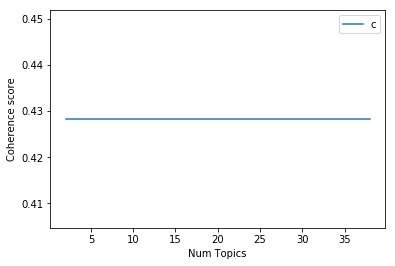

In [24]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

**5 THEMES**

In [25]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [26]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity:  -6.541974583559274

Coherence Score:  0.4281224522592037


In [27]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.357639  0.008634       1        1  46.452747
4      0.135065  0.322688       2        1  17.458294
1     -0.034409 -0.042296       3        1  15.082614
3      0.086705 -0.086907       4        1  14.425555
2      0.170278 -0.202118       5        1   6.580790, topic_info=     Category         Freq         Term        Total  loglift  logprob
16    Default  4692.000000        water  4692.000000  30.0000  30.0000
121   Default   819.000000      product   819.000000  29.0000  29.0000
74    Default   981.000000         work   981.000000  28.0000  28.0000
91    Default   946.000000         good   946.000000  27.0000  27.0000
92    Default  1372.000000        great  1372.000000  26.0000  26.0000
94    Default  1687.000000          hot  1687.000000  25.0000  25.0000
118   Default   605.000000          far   605.000000  24.0000  24.0000
141   Default  1158.000000         easy  1158.000000  23.0000  23.0000
83    Default  1243.000000         cold  1243.000000  22.0000  22.0000
291   Default   770.000000         unit   770.000000  21.0000  21.0000
72    Default   431.000000         well   431.000000  20.0000  20.0000
31    Default   845.000000    dispenser   845.000000  19.0000  19.0000
179   Default   822.000000          use   822.000000  18.0000  18.0000
27    Default   676.000000       cooler   676.000000  17.0000  17.0000
199   Default   265.000000         year   265.000000  16.0000  16.0000
79    Default   235.000000       button   235.000000  15.0000  15.0000
131   Default   235.000000          buy   235.000000  14.0000  14.0000
6     Default   222.000000       filter   222.000000  13.0000  13.0000
89    Default   560.000000          get   560.000000  12.0000  12.0000
244   Default   611.000000         look   611.000000  11.0000  11.0000
453   Default   205.000000        month   205.000000  10.0000  10.0000
99    Default   220.000000      machine   220.000000   9.0000   9.0000
412   Default   196.000000         pump   196.000000   8.0000   8.0000
10    Default   483.000000         nice   483.000000   7.0000   7.0000
498   Default   187.000000         heat   187.000000   6.0000   6.0000
21    Default   679.000000       bottle   679.000000   5.0000   5.0000
135   Default   700.000000         cool   700.000000   4.0000   4.0000
331   Default   123.000000      quality   123.000000   3.0000   3.0000
158   Default   448.000000         love   448.000000   2.0000   2.0000
318   Default   113.000000         door   113.000000   1.0000   1.0000
...       ...          ...          ...          ...      ...      ...
318    Topic5   113.116806         door   113.888649   2.7142  -3.6993
210    Topic5   104.668564        noise   105.444427   2.7136  -3.7769
341    Topic5    97.455719    excellent    98.217697   2.7132  -3.8483
542    Topic5    80.636765         leak    81.399780   2.7116  -4.0378
774    Topic5    85.876236   bottleless    86.715080   2.7113  -3.9748
315    Topic5    78.490234          add    79.305206   2.7107  -4.0648
0      Topic5    60.501625       arrive    61.261883   2.7085  -4.3251
1825   Topic5    59.541695      perform    60.323498   2.7080  -4.3411
323    Topic5    51.329739         open    52.112507   2.7059  -4.4895
444    Topic5    51.203922        start    51.985134   2.7059  -4.4919
332    Topic5    47.240692  much_easier    48.009766   2.7049  -4.5725
2302   Topic5    44.134216     productn    44.890491   2.7040  -4.6405
669    Topic5    41.376247       sturdy    42.149673   2.7025  -4.7050
1255   Topic5    38.766602    beautiful    39.540310   2.7013  -4.7702
952    Topic5    38.120388          own    38.927464   2.7001  -4.7870
434    Topic5    35.756924         ease    36.522541   2.6998  -4.8510
676    Topic5    36.991577          due    37.787247   2.6997  -4.8170
320    Topic5    30.337156         high    31.109472   2.6959  -5.0154
1201   Topic5    29.726400   

**7 THEMES**

In [28]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [29]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity:  -6.572737940180604

Coherence Score:  0.46279869266453844


In [30]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.251084 -0.178174       1        1  36.489361
0     -0.235486  0.244010       2        1  20.549145
5     -0.106191  0.064432       3        1  14.502282
1      0.039996 -0.254147       4        1  12.087255
3      0.140490 -0.066530       5        1   6.594141
6      0.209762  0.071454       6        1   5.329448
2      0.202514  0.118955       7        1   4.448368, topic_info=     Category         Freq                Term        Total  loglift  logprob
121   Default   725.000000             product   725.000000  30.0000  30.0000
16    Default  4836.000000               water  4836.000000  29.0000  29.0000
92    Default  1321.000000               great  1321.000000  28.0000  28.0000
141   Default  1145.000000                easy  1145.000000  27.0000  27.0000
94    Default  1744.000000                 hot  1744.000000  26.0000  26.0000
83    Default  1284.000000                cold  1284.000000  25.0000  25.0000
27    Default   668.000000              cooler   668.000000  24.0000  24.0000
74    Default   971.000000                work   971.000000  23.0000  23.0000
244   Default   603.000000                look   603.000000  22.0000  22.0000
91    Default   936.000000                good   936.000000  21.0000  21.0000
10    Default   478.000000                nice   478.000000  20.0000  20.0000
179   Default   829.000000                 use   829.000000  19.0000  19.0000
158   Default   443.000000                love   443.000000  18.0000  18.0000
21    Default   702.000000              bottle   702.000000  17.0000  17.0000
118   Default   599.000000                 far   599.000000  16.0000  16.0000
79    Default   299.000000              button   299.000000  15.0000  15.0000
384   Default   184.000000             kitchen   184.000000  14.0000  14.0000
6     Default   191.000000              filter   191.000000  13.0000  13.0000
199   Default   264.000000                year   264.000000  12.0000  12.0000
135   Default   697.000000                cool   697.000000  11.0000  11.0000
131   Default   236.000000                 buy   236.000000  10.0000  10.0000
31    Default   874.000000           dispenser   874.000000   9.0000   9.0000
291   Default   785.000000                unit   785.000000   8.0000   8.0000
383   Default   306.000000             install   306.000000   7.0000   7.0000
453   Default   206.000000               month   206.000000   6.0000   6.0000
59    Default   433.000000                 set   433.000000   5.0000   5.0000
78    Default   271.000000              bottom   271.000000   4.0000   4.0000
72    Default   427.000000                well   427.000000   3.0000   3.0000
412   Default   197.000000                pump   197.000000   2.0000   2.0000
88    Default   245.000000              gallon   245.000000   1.0000   1.0000
...       ...          ...                 ...          ...      ...      ...
332    Topic7    41.783669         much_easier    42.571438   3.0940  -4.3036
2302   Topic7    39.027538            productn    39.809605   3.0928  -4.3718
2431   Topic7    38.729782              greatn    39.512245   3.0926  -4.3795
1255   Topic7    34.286850           beautiful    35.073532   3.0899  -4.5014
356    Topic7    32.460068           difficult    33.244530   3.0888  -4.5561
434    Topic7    31.617397                ease    32.402248   3.0881  -4.5824
411    Topic7    28.691553                 ago    29.477444   3.0856  -4.6795
303    Topic7    29.536077              faucet    30.352282   3.0854  -4.6505
359    Topic7    26.414242              online    27.200905   3.0833  -4.7622
569    Topic7    26.094250          experience    26.879116   3.0830  -4.7744
963    Topic7    24.991606              louder    25.782103   3.0815  -4.8176
1228   Topic7    20.776688  instruction_manual    21.563509   3.0755  -5.0023
1806   Topic7    19.732916             

**10 THEMES**

In [31]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [32]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity:  -6.60910981380298

Coherence Score:  0.42886811743400505


In [33]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.322483 -0.186086       1        1  34.212471
8     -0.206049  0.281529       2        1  17.351261
5     -0.080077 -0.187908       3        1   9.594294
1     -0.067240 -0.004824       4        1   9.311231
9     -0.004399  0.223505       5        1   8.011271
7      0.154006 -0.026127       6        1   5.140726
6      0.146878 -0.014838       7        1   4.514345
4      0.146764 -0.031105       8        1   4.500054
2      0.103231 -0.052947       9        1   4.012775
3      0.129368 -0.001199      10        1   3.351578, topic_info=     Category         Freq         Term        Total  loglift  logprob
16    Default  4686.000000        water  4686.000000  30.0000  30.0000
141   Default  1131.000000         easy  1131.000000  29.0000  29.0000
92    Default  1413.000000        great  1413.000000  28.0000  28.0000
91    Default   763.000000         good   763.000000  27.0000  27.0000
291   Default   751.000000         unit   751.000000  26.0000  26.0000
94    Default  1685.000000          hot  1685.000000  25.0000  25.0000
74    Default   994.000000         work   994.000000  24.0000  24.0000
158   Default   450.000000         love   450.000000  23.0000  23.0000
121   Default   877.000000      product   877.000000  22.0000  22.0000
118   Default   488.000000          far   488.000000  21.0000  21.0000
244   Default   596.000000         look   596.000000  20.0000  20.0000
83    Default  1241.000000         cold  1241.000000  19.0000  19.0000
10    Default   472.000000         nice   472.000000  18.0000  18.0000
59    Default   409.000000          set   409.000000  17.0000  17.0000
31    Default   843.000000    dispenser   843.000000  16.0000  16.0000
179   Default   819.000000          use   819.000000  15.0000  15.0000
72    Default   437.000000         well   437.000000  14.0000  14.0000
27    Default   675.000000       cooler   675.000000  13.0000  13.0000
79    Default   282.000000       button   282.000000  12.0000  12.0000
135   Default   690.000000         cool   690.000000  11.0000  11.0000
199   Default   262.000000         year   262.000000  10.0000  10.0000
383   Default   328.000000      install   328.000000   9.0000   9.0000
131   Default   231.000000          buy   231.000000   8.0000   8.0000
299   Default   229.000000     dispense   229.000000   7.0000   7.0000
8     Default   408.000000         make   408.000000   6.0000   6.0000
498   Default   157.000000         heat   157.000000   5.0000   5.0000
93    Default   169.000000         home   169.000000   4.0000   4.0000
89    Default   546.000000          get   546.000000   3.0000   3.0000
453   Default   202.000000        month   202.000000   2.0000   2.0000
39    Default   256.000000           go   256.000000   1.0000   1.0000
...       ...          ...          ...          ...      ...      ...
201   Topic10    96.074036        drink    96.892059   3.3873  -3.1879
333   Topic10    82.216660      quickly    83.034691   3.3858  -3.3437
909   Topic10    48.345707        spill    49.163830   3.3790  -3.8746
332   Topic10    47.979706  much_easier    48.797733   3.3788  -3.8822
861   Topic10    47.943176   attractive    48.761230   3.3788  -3.8830
705   Topic10    44.713688       notice    45.531918   3.3776  -3.9527
565   Topic10    44.052479        short    44.870552   3.3773  -3.9676
217   Topic10    42.245003         hard    43.063072   3.3766  -4.0095
952   Topic10    38.740650          own    39.559177   3.3748  -4.0961
1220  Topic10    37.083279   absolutely    37.901451   3.3739  -4.1398
2156  Topic10    34.891453          itn    35.709415   3.3726  -4.2008
1545  Topic10    28.350479       silent    29.168694   3.3673  -4.4084
748   Topic10    24.241335      similar    25.060070   3.3625  -4.5650
2278  Topic10    17.991833    purchasen    18.813259   3.3511  -4.8631
1436  Topic10    17.716902          tip    

In [42]:
mallet_path = "C:\\Users\\91975\\Desktop\\mallet-2.0.8\\bin\\mallet.bat" # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


CalledProcessError: ignored